In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),\
(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
print('#train',len(xtrain))
print('#test',len(xtest))

#train 50000
#test 10000


In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
ytrain[0]

array([6], dtype=uint8)

In [ ]:
ytrain[0][0]

6

In [ ]:
ytrain[0,0]

6

In [ ]:
label_dict={0:"airplane",1:"automible",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
import matplotlib.pyplot as plt
def plot_image_label_prediction(images,labels,prediction,idx,num=10):
    label_dict={0:"airplane",1:"automible",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()    

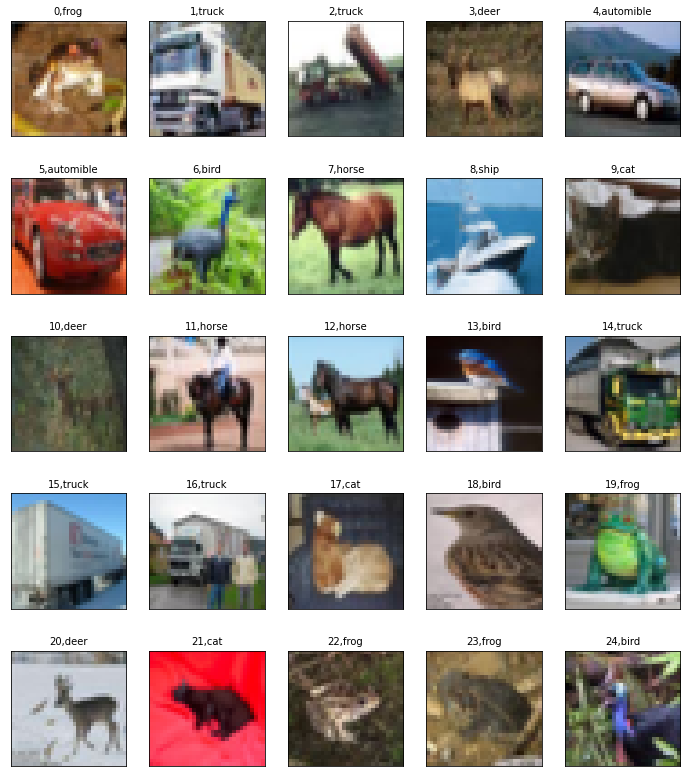

In [ ]:
plot_image_label_prediction(xtrain,ytrain,[],0,25)

In [ ]:
x_train_normal=xtrain.astype('float32')/255
x_test_normal=xtest.astype('float32')/255

In [ ]:
y_train=np_utils.to_categorical(ytrain)
y_test=np_utils.to_categorical(ytest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation,ZeroPadding2D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,
         kernel_size=(3,3),
         padding='same',
         input_shape=(32,32,3),
         activation='relu'))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters=64,
         kernel_size=(3,3),
         padding='same',
         activation='relu'))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dropout(0.25))

In [ ]:
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.25))

In [ ]:
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
training=model.fit(x=x_train_normal,
                  y=y_train,validation_split=0.2,
                  epochs=10,batch_size=128,verbose=2)

Epoch 1/10
313/313 - 2s - loss: 1.4504 - accuracy: 0.4800 - val_loss: 1.2140 - val_accuracy: 0.5865
Epoch 2/10
313/313 - 2s - loss: 1.0974 - accuracy: 0.6150 - val_loss: 1.0044 - val_accuracy: 0.6516
Epoch 3/10
313/313 - 2s - loss: 0.9430 - accuracy: 0.6691 - val_loss: 0.9302 - val_accuracy: 0.6775
Epoch 4/10
313/313 - 2s - loss: 0.8517 - accuracy: 0.7020 - val_loss: 0.8651 - val_accuracy: 0.6985
Epoch 5/10
313/313 - 2s - loss: 0.7534 - accuracy: 0.7331 - val_loss: 0.8195 - val_accuracy: 0.7172
Epoch 6/10
313/313 - 2s - loss: 0.6615 - accuracy: 0.7678 - val_loss: 0.8117 - val_accuracy: 0.7222
Epoch 7/10
313/313 - 2s - loss: 0.5838 - accuracy: 0.7945 - val_loss: 0.7764 - val_accuracy: 0.7356
Epoch 8/10
313/313 - 2s - loss: 0.5071 - accuracy: 0.8211 - val_loss: 0.7817 - val_accuracy: 0.7366
Epoch 9/10
313/313 - 2s - loss: 0.4314 - accuracy: 0.8508 - val_loss: 0.8203 - val_accuracy: 0.7274
Epoch 10/10
313/313 - 2s - loss: 0.3659 - accuracy: 0.8738 - val_loss: 0.8065 - val_accuracy: 0.7410

In [ ]:
prediction=np.argmax(model.predict(x_test_normal), axis=-1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

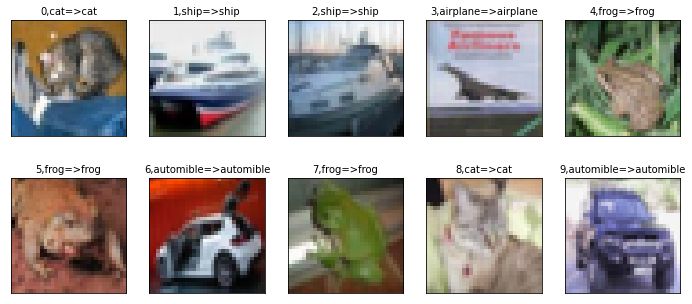

In [ ]:
plot_image_label_prediction(xtest,ytest,prediction,0,num=10)

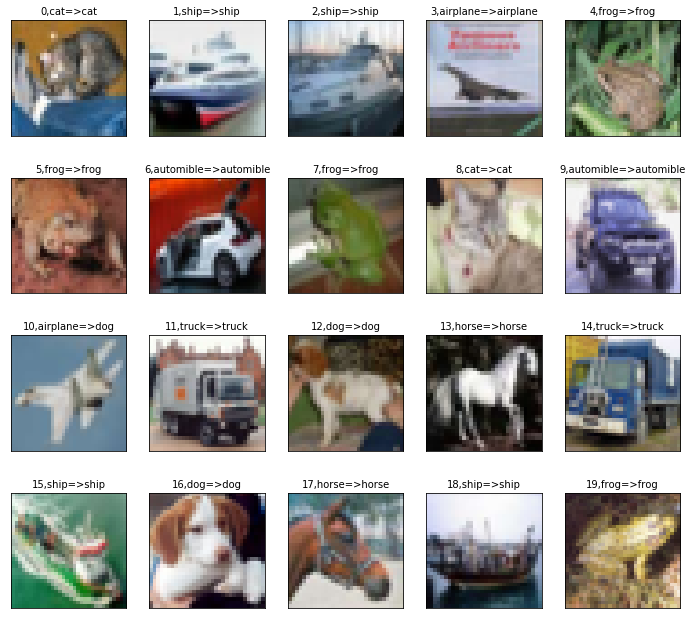

In [ ]:
plot_image_label_prediction(xtest,ytest,prediction,0,num=20)

In [ ]:
prediction[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 5, 9, 5, 7, 9, 8, 5, 7, 8, 6])

0:"airplane",1:"automible",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"

In [ ]:
predict_prob=model.predict(x_test_normal)

In [ ]:
def show_predict_prob(y,prediction,x,prob,idx):
    print('label:',label_dict[y[idx][0]],'predict:',label_dict[prediction[idx]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x[idx],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' probability:%1.9f'%(prob[idx][j]))

label: cat predict: cat


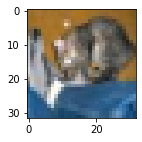

airplane probability:0.000242943
automible probability:0.000616274
bird probability:0.084396608
cat probability:0.849583805
deer probability:0.000768331
dog probability:0.059764486
frog probability:0.001013177
horse probability:0.001387640
ship probability:0.002203340
truck probability:0.000023404


In [ ]:
show_predict_prob(ytest,prediction,xtest,predict_prob,0)

label: ship predict: ship


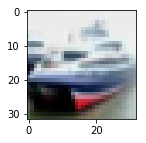

airplane probability:0.000416311
automible probability:0.042784031
bird probability:0.000000000
cat probability:0.000000002
deer probability:0.000000000
dog probability:0.000000001
frog probability:0.000000001
horse probability:0.000000000
ship probability:0.956738889
truck probability:0.000060843


In [ ]:
show_predict_prob(ytest,prediction,xtest,predict_prob,1)